## Observations and Insights 

In [332]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

finaldf = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
finaldf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [333]:
# Checking the number of mice.
print ( len(mouse_metadata["Mouse ID"]))

249


In [334]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = finaldf.loc[finaldf.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [335]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.DataFrame(dup_mice_id)

,0
0,g989


In [336]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = finaldf[finaldf['Mouse ID'].isin(dup_mice_id)==False]

In [337]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df["Mouse ID"].value_counts()
print(len(clean_df_count))

248


## Summary Statistics

In [338]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mm3_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
mm3_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
mm3_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
mm3_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
mm3_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


summary_df = pd.DataFrame({"Mean": mm3_mean, "Median":mm3_median, "Variance":mm3_variance, "Standard Deviation": mm3_std, "SEM": mm3_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [339]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_line_summary = clean_df.groupby('Drug Regimen')
single_line_summary_df = single_line_summary.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
single_line_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

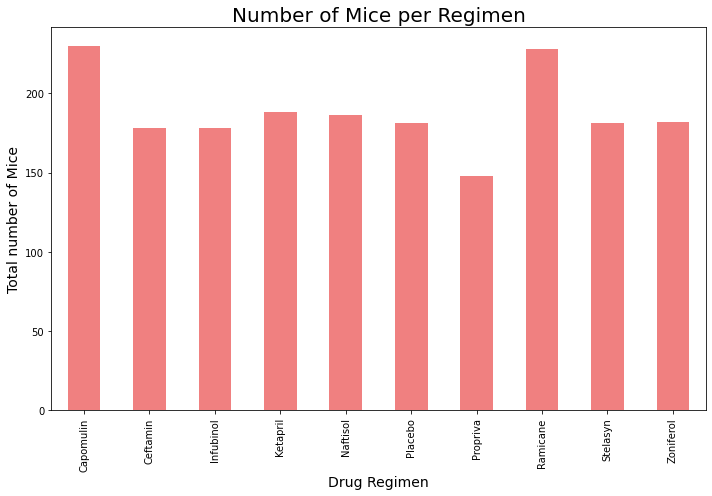

In [340]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

test_count = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = test_count.plot.bar(figsize=(10,7),facecolor="lightcoral",fontsize = 10)
test_count
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Total number of Mice",fontsize = 14)
plt.title("Number of Mice per Regimen",fontsize = 20)
plt.tight_layout()
plt.show()


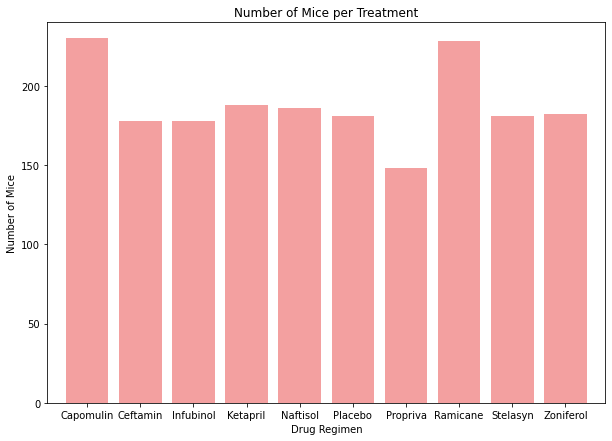

In [341]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

mice_count =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

x_axis = np.arange(len(test_count))
f, ax = plt.subplots(figsize=(10, 7))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)
  
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_list)+10)

plt.bar(x_axis, mice_count,facecolor="lightcoral", alpha=0.75, align="center")
plt.xticks(tick_locations, drug_regimen)
plt.show()


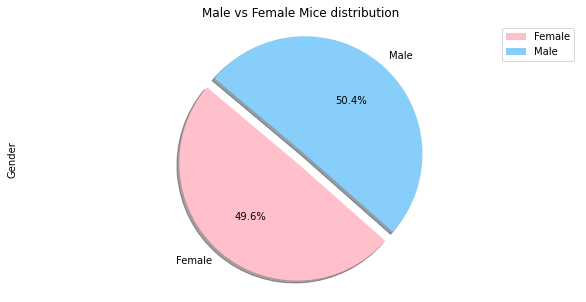

In [342]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Grouping by gender

groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

#Count by female and male mice

gender_count = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_count.columns = ["Count"]

#Formating

gender_count["% of Sex"] = (100*(gender_count["Count"]/gender_count["Count"].sum()))
gender_count["% of Sex"] = gender_count["% of Sex"]

#plot
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mice distribution')
plt.ylabel('Gender')
plt.axis("equal")
plt.show()

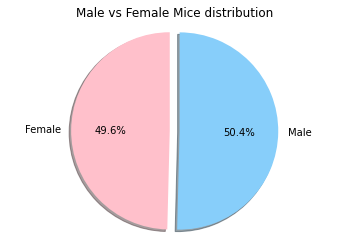

In [343]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create list

Gender = ["Female","Male"]
Percentage = [49.6,50.4]
colors = ['pink', 'lightskyblue']

#Plot

plt.title("Male vs Female Mice distribution")
plt.pie(Percentage, explode=explode, labels=Gender, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [344]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
                             
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# Capomulin
Capomulin_last = Capomulin_df.groupby(['Mouse ID','Drug Regimen','Sex','Age_months',"Weight (g)","Tumor Volume (mm3)","Metastatic Sites"]).max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)

Ramicane_last = Ramicane_df.groupby(['Mouse ID','Drug Regimen','Sex','Age_months',"Weight (g)","Tumor Volume (mm3)","Metastatic Sites"]).max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)

Infubinol_last = Infubinol_df.groupby(['Mouse ID','Drug Regimen','Sex','Age_months',"Weight (g)","Tumor Volume (mm3)","Metastatic Sites"]).max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)

Ceftamin_last = Ceftamin_df.groupby(['Mouse ID','Drug Regimen','Sex','Age_months',"Weight (g)","Tumor Volume (mm3)","Metastatic Sites"]).max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

Capomulin_merge = pd.merge(Capomulin_vol,clean_df, on=("Mouse ID","Timepoint"),how="left")

Ramicane_merge = pd.merge(Ramicane_vol,Capomulin_merge, on=("Mouse ID","Timepoint",'Drug Regimen','Sex','Age_months',"Weight (g)","Tumor Volume (mm3)","Metastatic Sites"),how="outer")

Infubinol_merge = pd.merge(Infubinol_vol,Ramicane_merge, on=("Mouse ID","Timepoint",'Drug Regimen','Sex','Age_months',"Weight (g)","Tumor Volume (mm3)","Metastatic Sites"),how="outer")

Full_merge = pd.merge(Ceftamin_vol,Infubinol_merge, on=("Mouse ID","Timepoint",'Drug Regimen','Sex','Age_months',"Weight (g)","Tumor Volume (mm3)","Metastatic Sites"),how="outer")

Full_merge.sort_values(by='Drug Regimen', ascending=True)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
813,y793,0,Capomulin,Male,17,17,45.000000,0
666,j246,10,Capomulin,Female,21,21,46.408361,0
665,j246,5,Capomulin,Female,21,21,45.641438,0
664,j246,0,Capomulin,Female,21,21,45.000000,0
663,j246,25,Capomulin,Female,21,21,44.555226,0
...,...,...,...,...,...,...,...,...
501,m546,10,Ramicane,Male,18,16,43.748224,0
500,m546,5,Ramicane,Male,18,16,42.998876,0
499,m546,15,Ramicane,Male,18,16,39.897435,0
526,q610,10,Ramicane,Female,18,21,44.991485,0


In [345]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
      
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
tumors_list = Full_merge["Tumor Volume (mm3)"] 

quartiles =tumors_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} or above {upper_bound} could be considered as outliers.")


Lower quartile: 40.220170787499995
Upper quartile: 50.356470630000004
IQR: 10.136299842500009
Median: 45.0 
Values below 25.015721023749983 or above 65.56092039375002 could be considered as outliers.


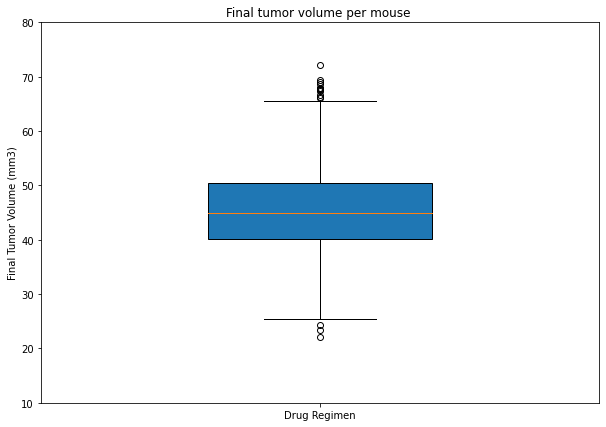

In [346]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin_list = Full_merge["Tumor Volume (mm3)"] 

tumors_plot = [Capomulin_list]
Regimen= ['Drug Regimen']

fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_title('Final tumor volume per mouse ')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumors_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

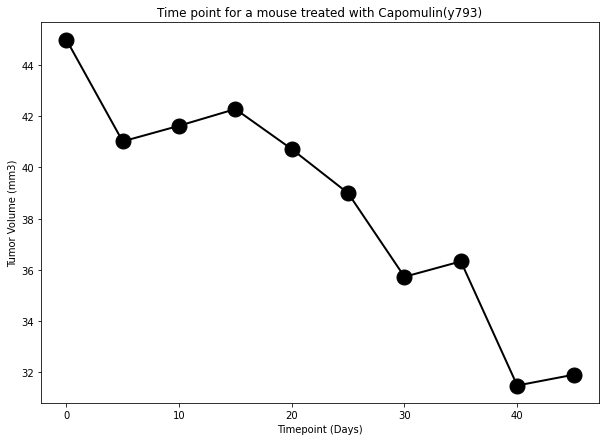

In [347]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "y793",:]

Timepoint = Capomulin_plot["Timepoint"]
TumorVolume = Capomulin_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.title("Time point for a mouse treated with Capomulin(y793)")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(Timepoint, TumorVolume,linewidth=2, markersize=15,marker="o",color="black", label="Fahreneit")
plt.show()

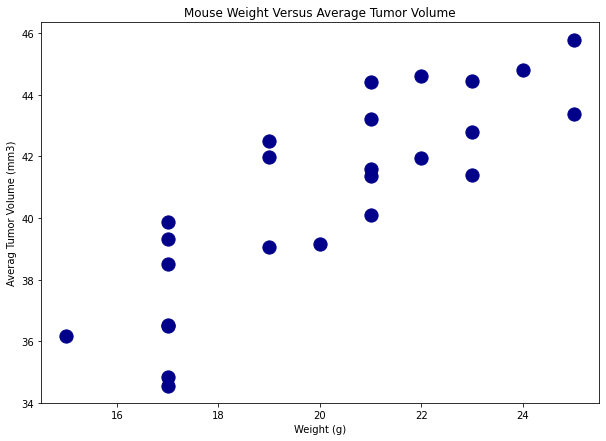

In [348]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig2, ax2 = plt.subplots(figsize=(10, 7))

avg_tumor_vol =Capomulin_df.groupby(['Mouse ID']).mean()
mouse_weight= 17

plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'],s=175, color="darkblue")

plt.show()

## Correlation and Regression

In [349]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation =round(st.pearsonr(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [350]:
x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241047
intercept:21.55216053268501
rvalue (Correlation coefficient):0.841936342469472
pandas (Correlation coefficient):0.84
stderr:0.1275435903320133
y = 0.95x + 21.55


The r-squared is: 0.7088568047708721


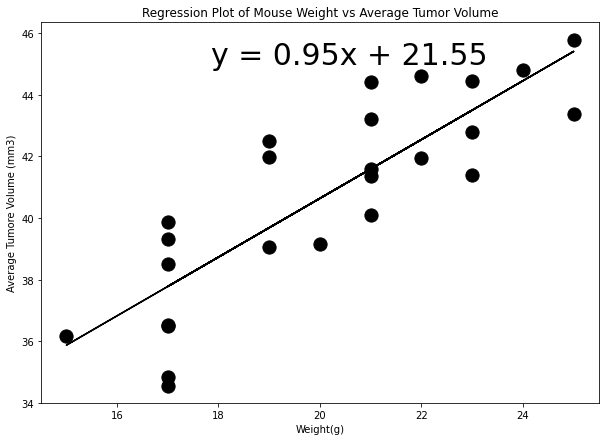

In [351]:
# Add the linear regression equation and line to plot
fig3, ax3 = plt.subplots(figsize=(10, 7))

plt.scatter(x_values,y_values,s=175, color="black")
plt.plot(x_values,regress_values,"black")

plt.title('Regression Plot of Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

ax3.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="black")

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [352]:
#Three observations or inferences that can be made from the data
# 1. Capomulin has the highest number of mice tested followed by Ramicane
# 2. The drug regimen has almost equal Male vs Female Mice distribution male being sligtly higer 
# 3. majority of tumor volumes across four regimens lie between lower and upper quartile 